In [1]:
# Importing necessary libraries
from sklearn.decomposition import PCA
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = []
for img_path in glob.glob('./poker card (2)/poker card/*.bmp'):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    images.append(img)

D:\Anaconda\Anaconda3\envs\ProjectTKU\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  after removing the cwd from sys.path.


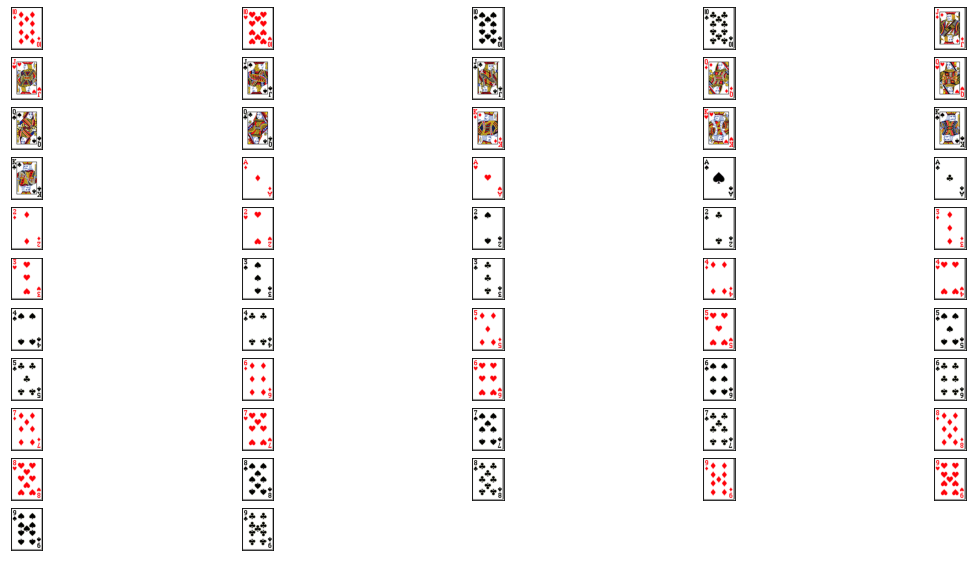

In [3]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

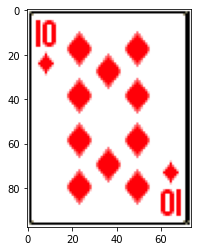

In [4]:
plt.imshow(images[0])
plt.show()

In [5]:
images[0].shape

(98, 74, 3)

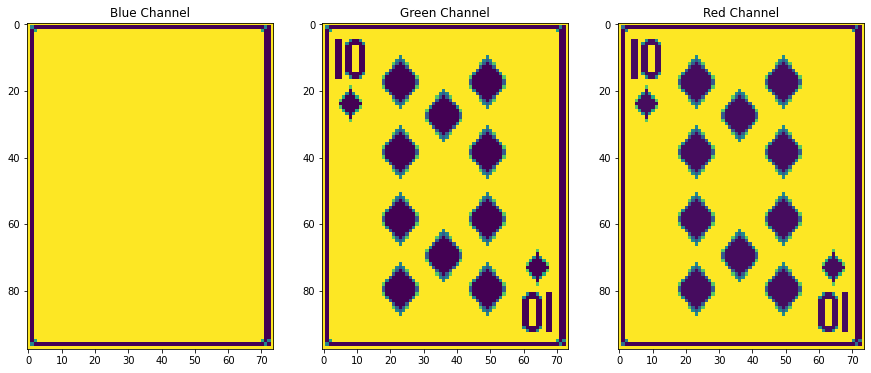

In [6]:
# Splitting into channels
blue, green, red = cv2.split(images[0])
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [7]:
print(blue.shape)
print(red.shape)
print(green.shape)

(98, 74)
(98, 74)
(98, 74)


In [8]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [9]:
cov_mat_blue = np.cov(df_blue.T)
eigen_vals_blue, eigen_vecs_blue = np.linalg.eig(cov_mat_blue)

print('\nEigenvalues for blue \n%s' % eigen_vals_blue)

cov_mat_red = np.cov(df_red.T)
eigen_vals_red, eigen_vecs_red = np.linalg.eig(cov_mat_red)

print('\nEigenvalues for red \n%s' % eigen_vals_red)

cov_mat_green = np.cov(df_green.T)
eigen_vals_green, eigen_vecs_green = np.linalg.eig(cov_mat_green)

print('\nEigenvalues for green \n%s' % eigen_vals_green)


Eigenvalues for blue 
[ 1.40085861e+000+0.00000000e+000j  6.08644882e-002+0.00000000e+000j
  6.68220441e-003+0.00000000e+000j  6.11641457e-004+0.00000000e+000j
 -4.81365467e-018+0.00000000e+000j  1.27580764e-018+0.00000000e+000j
  7.57946275e-020+0.00000000e+000j -2.17430043e-020+0.00000000e+000j
  2.06984343e-034+1.25718550e-033j  2.06984343e-034-1.25718550e-033j
 -6.02174840e-034+0.00000000e+000j -9.48048286e-036+0.00000000e+000j
  1.09926228e-035+4.71679433e-036j  1.09926228e-035-4.71679433e-036j
 -8.70898018e-038+0.00000000e+000j  3.99510104e-039+0.00000000e+000j
 -3.19659488e-051+0.00000000e+000j -1.88440339e-050+0.00000000e+000j
  4.69888419e-052+0.00000000e+000j  1.06827793e-052+0.00000000e+000j
 -1.14022882e-052+0.00000000e+000j -7.18097385e-053+0.00000000e+000j
 -1.62777409e-054+1.86477109e-054j -1.62777409e-054-1.86477109e-054j
 -1.73263236e-055+0.00000000e+000j  8.31588798e-056+0.00000000e+000j
  1.47336312e-056+0.00000000e+000j -5.68387435e-061+0.00000000e+000j
 -3.6483179

In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs_blue = [(np.abs(eigen_vals_blue[i]), eigen_vecs_blue[:, i])
               for i in range(len(eigen_vals_blue))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs_blue.sort(key=lambda k: k[0], reverse=True)

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs_red = [(np.abs(eigen_vals_red[i]), eigen_vecs_red[:, i])
               for i in range(len(eigen_vals_red))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs_red.sort(key=lambda k: k[0], reverse=True)

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs_green = [(np.abs(eigen_vals_green[i]), eigen_vecs_green[:, i])
               for i in range(len(eigen_vals_green))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs_green.sort(key=lambda k: k[0], reverse=True)

In [11]:
w_blue = np.hstack((eigen_pairs_blue[0][1][:, np.newaxis],
               eigen_pairs_blue[1][1][:, np.newaxis]))
print('Matrix W_blue:\n', w_blue)

w_red = np.hstack((eigen_pairs_red[0][1][:, np.newaxis],
               eigen_pairs_red[1][1][:, np.newaxis]))
print('Matrix W_red:\n', w_red)

w_green = np.hstack((eigen_pairs_green[0][1][:, np.newaxis],
               eigen_pairs_green[1][1][:, np.newaxis]))
print('Matrix W_green:\n', w_green)

Matrix W_blue:
 [[ 0.        +0.j  0.        +0.j]
 [-0.05312738+0.j -0.56908645+0.j]
 [ 0.11959334+0.j  0.00542318+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0.12005895+0.j -0.00758395+0.j]
 [ 0

In [12]:
trans_pca_b = df_blue.dot(w_blue)
trans_pca_g = df_green.dot(w_green)
trans_pca_r = df_red.dot(w_red)

In [18]:
trans_pca_b.shape

(98, 2)

In [21]:
# Set pca to find principal components that explain 90% of the variation in the data
# 保留 80%
pca_b = PCA(2)
pca_b.fit(df_blue)
pca_g = PCA(2)
pca_g.fit(df_green)
pca_r = PCA(2)
pca_r.fit(df_red)


PCA(n_components=2)

In [22]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(98, 74) (98, 74) (98, 74)


In [29]:
img_reduced = cv2.merge(((int(b_arr[0][0]), int(b_arr[0][1])), (int(g_arr[0][0]), int(g_arr[0][1])), (int(r_arr[0][0]), int(r_arr[0][1]))))
print(img_reduced.shape)

D:\Anaconda\Anaconda3\envs\ProjectTKU\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


(2, 1, 3)


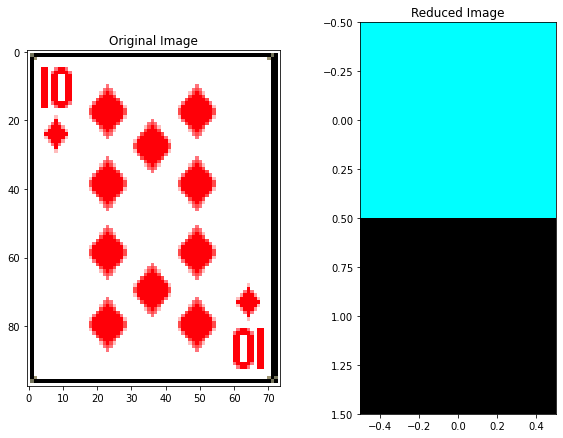

In [30]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(images[0])
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()